#SQL Design

##Problem 1 - ERD Diagram for a Library

Design a database that will track information about books as follows:

 - Information about each book, such as the book's title, date of publication, and publisher.

 - Information about the publisher, such as the publisher's telephone number, address, and ZIP Code/Postal Code.


## ERD Diagram for the Library Problem


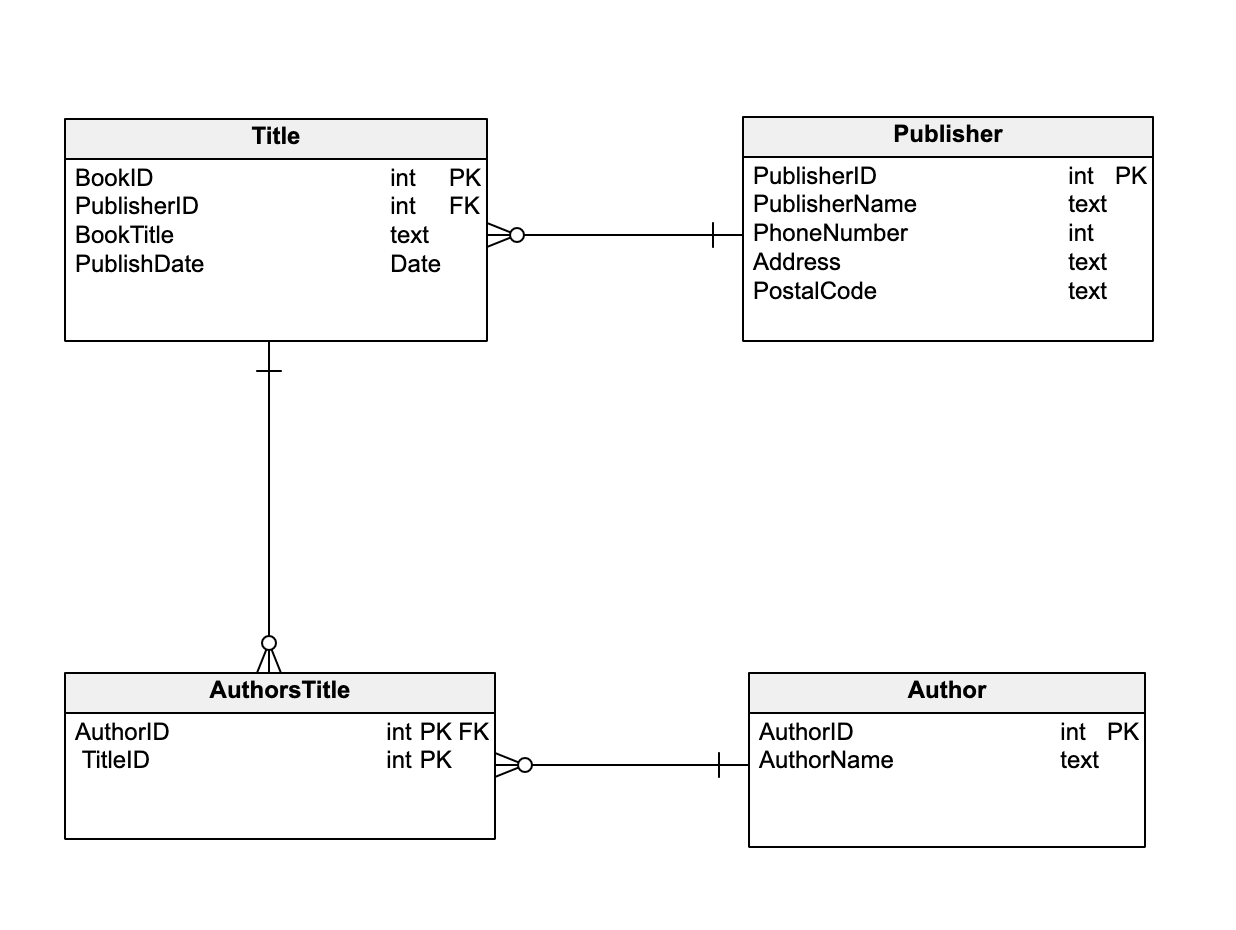

## Creating Database based on the SQL Design

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


The `%load_extension` ... is an example of *magic* commands that are available of iPython environments such as Jupyter notebooks.

Create a new database in the local filesystem and use the relative file indexing to specify where the file is.

In [ ]:
%sql sqlite:///test.db

## Creating Tables

In [ ]:
%%sql

CREATE TABLE IF NOT EXISTS Authors (
  AuthorID      INTEGER PRIMARY KEY AUTOINCREMENT,
  name          TEXT);


CREATE TABLE IF NOT EXISTS Titles (
  BookID      INTEGER PRIMARY KEY AUTOINCREMENT,
  BookTitle   TEXT,
  PublishDate TEXT,
  PublisherID INTEGER,
  FOREIGN KEY (PublisherID) REFERENCES Publisher(PublisherID)
  );


  CREATE TABLE IF NOT EXISTS AuthorsTitle (
  AuthorID  INTEGER NOT NULL,
  TitleID INTEGER NOT NULL,
  FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID),
  FOREIGN KEY (TitleID) REFERENCES Titles(BookID),
  PRIMARY KEY (AuthorID, TitleID)
  );

  CREATE TABLE IF NOT EXISTS Publisher (
  PublisherID   INTEGER PRIMARY KEY,
  name          TEXT,
  Address       TEXT,
  PhoneNumber   Text,
  PostalCode    Text);




 * sqlite:///test.db
Done.
Done.
Done.
Done.


[]

##Problem 2 - ERD Diagram for a Car Dealership

A dealership sells both new and used cars, and it operates a service facility. Design a database based on the following business rules:

* A salesperson may sell many cars, but each car is sold by only one salesperson.
* A customer may buy many cars, but each car is bought by only one customer.
* A salesperson writes a single invoice for each car he or she sells.
* A customer gets an invoice for each car he or she buys.
* A customer may come in just to have his or her car serviced; that is, a customer need not buy a car to be classified as a customer.
* When a customer takes one or more cars in for repair or service, one service ticket is written for each car.
* The car dealership maintains a service history for each of the cars serviced.
* The service  records are referenced by the car’s serial number.
* A car brought in for service can be worked on by many mechanics, and each mechanic may work on many cars.
* A car that is serviced may or may not need parts (e.g., adjusting a carburetor or cleaning a fuel injector nozzle does not require providing new parts).


 To create this ERD diagram, I used [Vertabelo](https://my.vertabelo.com/).

[Dealership ERD Diagram](https://my.vertabelo.com/model/1TUWfViZPGlwnMS1RcaAgR1botxe5HW4)

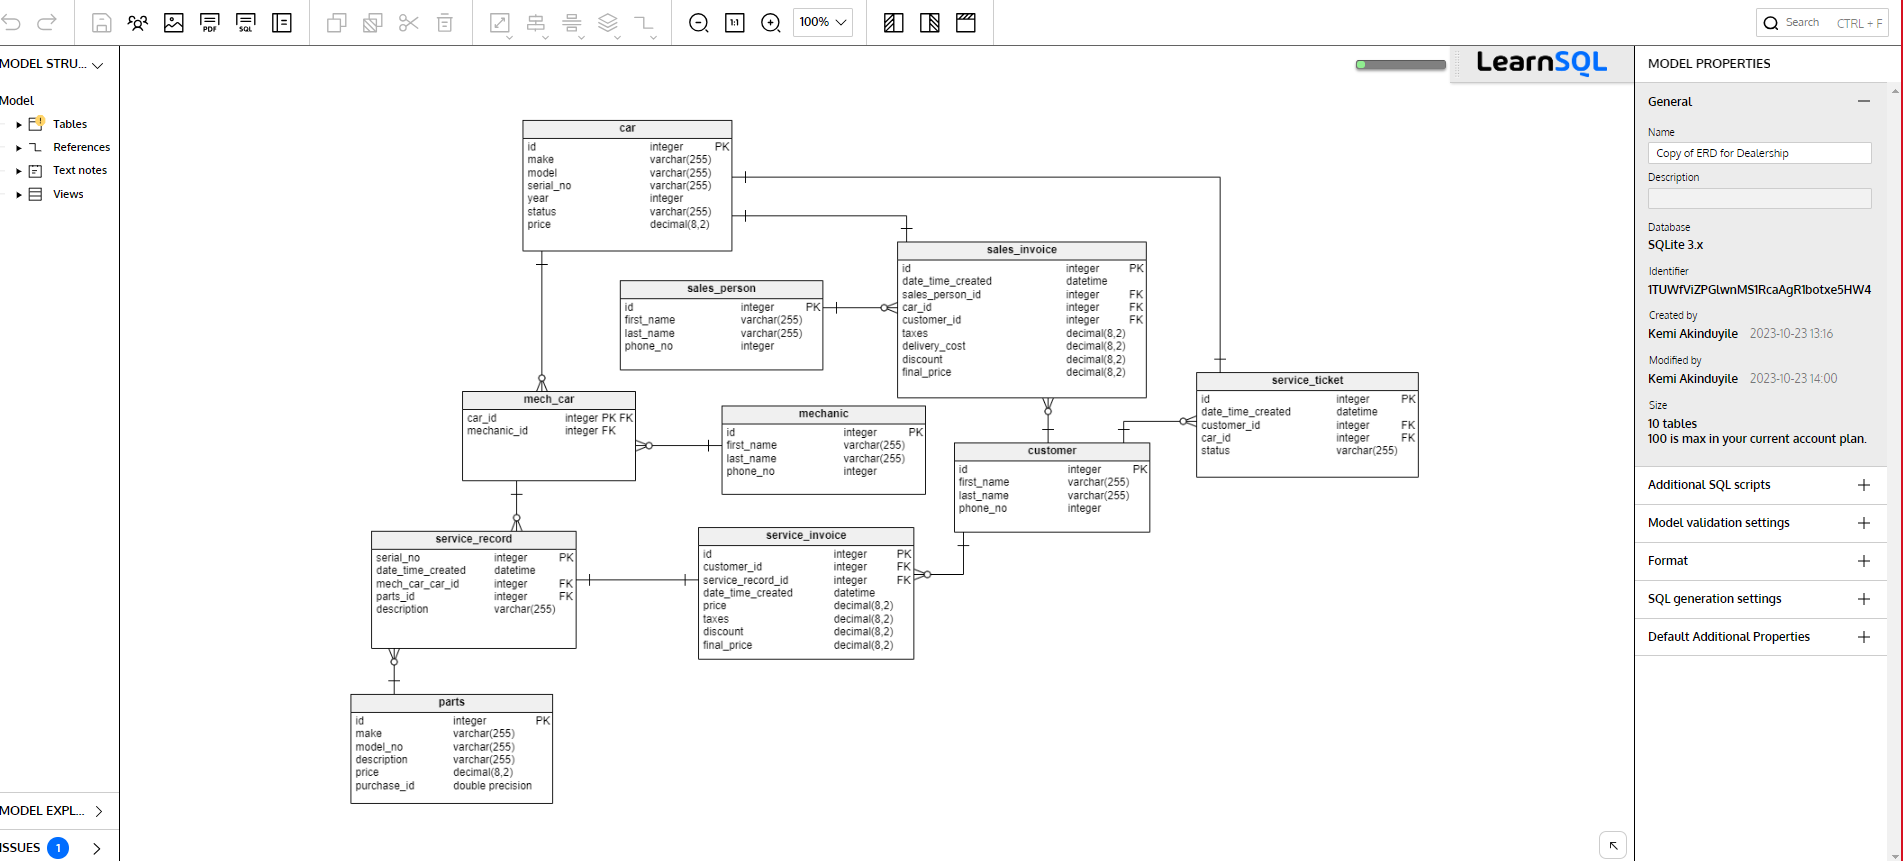

Load sql extention, open a new database and add the required tables based on the design.

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
%sql sqlite:///dealership.db

In [ ]:

%%sql

CREATE TABLE car (
    id integer NOT NULL CONSTRAINT car_pk PRIMARY KEY,
    make varchar(255) NOT NULL,
    model varchar(255) NOT NULL,
    serial_no varchar(255) NOT NULL,
    year integer NOT NULL,
    status varchar(255) NOT NULL,
    price decimal(8,2) NOT NULL
);

-- Table: customer
CREATE TABLE customer (
    id integer NOT NULL CONSTRAINT customer_pk PRIMARY KEY,
    first_name varchar(255) NOT NULL,
    last_name varchar(255) NOT NULL,
    phone_no integer NOT NULL
);

-- Table: mech_car
CREATE TABLE mech_car (
    car_id integer NOT NULL CONSTRAINT mech_car_pk PRIMARY KEY,
    mechanic_id integer NOT NULL,
    CONSTRAINT mech_car_car FOREIGN KEY (car_id)
    REFERENCES car (id),
    CONSTRAINT mech_car_mechanic FOREIGN KEY (mechanic_id)
    REFERENCES mechanic (id)
);

-- Table: mechanic
CREATE TABLE mechanic (
    id integer NOT NULL CONSTRAINT mechanic_pk PRIMARY KEY,
    first_name varchar(255) NOT NULL,
    last_name varchar(255) NOT NULL,
    phone_no integer NOT NULL
);

-- Table: parts
CREATE TABLE parts (
    id integer NOT NULL CONSTRAINT parts_pk PRIMARY KEY,
    make varchar(255) NOT NULL,
    model_no varchar(255) NOT NULL,
    description varchar(255) NOT NULL,
    price decimal(8,2) NOT NULL,
    purchase_id double precision NOT NULL
);

-- Table: sales_invoice
CREATE TABLE sales_invoice (
    id integer NOT NULL CONSTRAINT sales_invoice_pk PRIMARY KEY,
    date_time_created datetime NOT NULL,
    sales_person_id integer NOT NULL,
    car_id integer NOT NULL,
    customer_id integer NOT NULL,
    taxes decimal(8,2) NOT NULL,
    delivery_cost decimal(8,2) NOT NULL,
    discount decimal(8,2) NOT NULL,
    final_price decimal(8,2) NOT NULL,
    CONSTRAINT invoice_sales_person FOREIGN KEY (sales_person_id)
    REFERENCES sales_person (id),
    CONSTRAINT invoice_car FOREIGN KEY (car_id)
    REFERENCES car (id),
    CONSTRAINT invoice_customer FOREIGN KEY (customer_id)
    REFERENCES customer (id)
);

-- Table: sales_person
CREATE TABLE sales_person (
    id integer NOT NULL CONSTRAINT sales_person_pk PRIMARY KEY,
    first_name varchar(255) NOT NULL,
    last_name varchar(255) NOT NULL,
    phone_no integer NOT NULL
);

-- Table: service_invoice
CREATE TABLE service_invoice (
    id integer NOT NULL CONSTRAINT service_invoice_pk PRIMARY KEY,
    customer_id integer NOT NULL,
    service_record_id integer NOT NULL,
    date_time_created datetime NOT NULL,
    price decimal(8,2) NOT NULL,
    taxes decimal(8,2) NOT NULL,
    discount decimal(8,2) NOT NULL,
    final_price decimal(8,2) NOT NULL,
    CONSTRAINT service_payment_service_record FOREIGN KEY (service_record_id)
    REFERENCES service_record (serial_no),
    CONSTRAINT service_invoice_customer FOREIGN KEY (customer_id)
    REFERENCES customer (id)
);

-- Table: service_record
CREATE TABLE service_record (
    serial_no integer NOT NULL CONSTRAINT service_record_pk PRIMARY KEY,
    date_time_created datetime NOT NULL,
    mech_car_car_id integer NOT NULL,
    parts_id integer NOT NULL,
    description varchar(255) NOT NULL,
    CONSTRAINT service_record_part FOREIGN KEY (parts_id)
    REFERENCES parts (id),
    CONSTRAINT service_record_mech_car FOREIGN KEY (mech_car_car_id)
    REFERENCES mech_car (car_id)
);

-- Table: service_ticket
CREATE TABLE service_ticket (
    id integer NOT NULL CONSTRAINT service_ticket_pk PRIMARY KEY,
    date_time_created datetime NOT NULL,
    customer_id integer NOT NULL,
    car_id integer NOT NULL,
    status varchar(255) NOT NULL,
    CONSTRAINT service_ticket_customer FOREIGN KEY (customer_id)
    REFERENCES customer (id),
    CONSTRAINT service_ticket_car FOREIGN KEY (car_id)
    REFERENCES car (id)
);



 * sqlite:///dealership.db
   sqlite:///test.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]